In [2]:
!pip install yfinance

ERROR: huggingface-hub 0.2.1 has requirement packaging>=20.9, but you'll have packaging 20.4 which is incompatible.
ERROR: en-core-web-sm 1.2.0 has requirement spacy<2.0.0,>=1.7.0, but you'll have spacy 3.2.1 which is incompatible.


  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8493 sha256=32876b4e433418a89e18b652ca288b086be2ed735ac62f0e07986940b978f5fd
  Stored in directory: c:\users\alexj\appdata\local\pip\cache\wheels\21\c9\66\b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0


In [125]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lr=LinearRegression()

start_date='2000-01-01'
end_date='2022-01-01'

eurusd_df = yf.download('EURUSD=X')["Adj Close"]



[*********************100%***********************]  1 of 1 completed


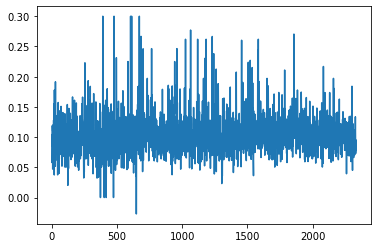

In [45]:
from textblob import TextBlob

url="https://minio.lab.sspcloud.fr/aissac/Projet_Python_2A/clean_ecb_speeches_dataset.csv"

df=pd.read_csv(url,sep = ",",encoding='utf-8')

df["textblob-score"]=pd.Series(dtype=int)
def textblob_score(text):
    return TextBlob(text).sentiment.polarity

df["textblob-score"]=df["contents"].apply(textblob_score)
df["textblob-score"].plot()

In [221]:
df.index = df["date"].apply(pd.to_datetime)
sentiments = df["textblob-score"].groupby("date").mean()

In [155]:
data

,Adj Close,textblob-score
2003-12-03,1.208897,0.131415
2003-12-10,1.224995,0.105858
2004-01-15,1.265102,0.126981
2004-01-16,1.260097,0.140738
2004-01-20,1.235407,0.121747
...,...,...
2021-11-25,1.124493,0.110057
2021-11-26,1.120298,0.110466
2021-11-29,1.120963,0.118910
2021-12-08,1.128668,0.088117


In [223]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [230]:
df["speakers"] = le.fit_transform(df["speakers"])
features = df[["speakers","Year","Month","Day","DayofWeek","textblob-score"]].groupby("date").mean()

In [231]:
target = pd.concat([eurusd_df, features], axis = 1, join = "inner")["Adj Close"]
target = target.diff().div(target).dropna()

data = pd.concat([target, features], axis = 1, join = "inner")

In [232]:
Y_train = target[1:1200]
Y_test = target[1200:]
X_train = data.iloc[:1199]
X_test = data.iloc[1199:-1]

In [233]:
target, data

(2003-12-03    0.013030
 2003-12-10    0.005577
 2004-01-15    0.032538
 2004-01-16   -0.016369
 2004-01-20    0.015175
                 ...   
 2021-11-25   -0.003745
 2021-11-26    0.000594
 2021-11-29    0.007398
 2021-12-08   -0.001479
 2021-12-10    0.001488
 Name: Adj Close, Length: 1379, dtype: float64,
             Adj Close   speakers    Year  Month   Day  DayofWeek  \
 2003-12-03   0.013030   9.000000  2003.0   12.0   3.0        3.0   
 2003-12-10   0.005577   4.000000  2003.0   12.0  10.0        3.0   
 2004-01-15   0.032538   9.000000  2004.0    1.0  15.0        4.0   
 2004-01-16  -0.016369   9.000000  2004.0    1.0  16.0        5.0   
 2004-01-20   0.015175  17.000000  2004.0    1.0  20.0        2.0   
 ...               ...        ...     ...    ...   ...        ...   
 2021-11-25  -0.003745   6.000000  2021.0   11.0  25.0        4.0   
 2021-11-26   0.000594   3.000000  2021.0   11.0  26.0        5.0   
 2021-11-29   0.007398   3.000000  2021.0   11.0  29.0        1.0  

,Adj Close,textblob-score
2003-12-03,0.013030,0.131415
2003-12-10,0.005577,0.105858
2004-01-15,0.032538,0.126981
2004-01-16,-0.016369,0.140738
2004-01-20,0.015175,0.121747
...,...,...
2021-11-25,-0.003745,0.110057
2021-11-26,0.000594,0.110466
2021-11-29,0.007398,0.118910
2021-12-08,-0.001479,0.088117


In [234]:
lr = lr.fit(X_train, Y_train)

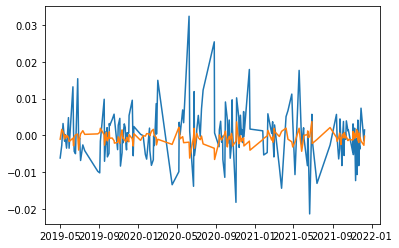

In [235]:
plt.plot(Y_test.index, Y_test)
plt.plot(Y_test.index, lr.predict(X_test))

In [212]:
lr.score(X_test, Y_test)

-0.0386269744169363

In [236]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

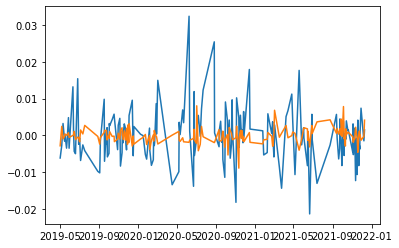

In [239]:
plt.plot(Y_test.index, Y_test)
plt.plot(Y_test.index, rf.predict(X_test))

In [240]:
rf.feature_importances_

array([0.36570031, 0.08199869, 0.08284477, 0.08474587, 0.16970381,
       0.04861894, 0.16638761])

In [243]:
X_train

,Adj Close,speakers,Year,Month,Day,DayofWeek,textblob-score
2003-12-03,0.013030,9.0,2003.0,12.0,3.0,3.0,0.131415
2003-12-10,0.005577,4.0,2003.0,12.0,10.0,3.0,0.105858
2004-01-15,0.032538,9.0,2004.0,1.0,15.0,4.0,0.126981
2004-01-16,-0.016369,9.0,2004.0,1.0,16.0,5.0,0.140738
2004-01-20,0.015175,17.0,2004.0,1.0,20.0,2.0,0.121747
...,...,...,...,...,...,...,...
2019-03-22,0.004856,26.0,2019.0,3.0,22.0,5.0,0.096223
2019-03-27,-0.008884,19.0,2019.0,3.0,27.0,3.0,0.072613
2019-03-29,-0.003991,1.0,2019.0,3.0,29.0,5.0,0.091287
2019-04-01,-0.000550,15.0,2019.0,4.0,1.0,1.0,0.124238
